# Baseline Model: Linear Regression

Single shot and predict one day ahead

Import libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [34]:
df=pd.read_csv('../dataset_for_analysis/data_weather_new.csv',parse_dates=['date'])

## Normalization and modeling

Define the features and predicted target

In [35]:
X=df[['cloud_cover','sunshine','global_radiation','pressure']]
Y=df[['mean_temp','max_temp','min_temp','precipitation']]

Initiate the Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

## Single output

Define the models for each target variable

In [37]:
from sklearn.linear_model import LinearRegression

# Create linear regression models
models={
    'mean_temp':LinearRegression(),
    'precipitation':LinearRegression(),
    'min_temp':LinearRegression(),
    'max_temp':LinearRegression()
}


Use cross validation method to evaluate the model

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Initiate the Time Series Split
tscv=TimeSeriesSplit(n_splits=5)

# Train the models
for target_variable,model in models.items():

    # Store the mse value
    mse_scores=[]

    # Split the training set and test set
    for train_index,test_index in tscv.split(df):
        X_train=X.iloc[train_index]
        y_train=Y[target_variable].iloc[train_index]

        X_test=X.iloc[test_index]
        y_test=Y[target_variable].iloc[test_index]

        # Normalize the data
        scaler=StandardScaler()
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.fit_transform(X_test)

        # Train the model
        model.fit(X_train,y_train)

        # Make the predictions
        y_pred=model.predict(X_test)

        # Calculate the mean squared error
        mse=mean_squared_error(y_test,y_pred)
        mse_scores.append(mse)

    # Print the result
    print(f'MSE of {target_variable} prediction: {np.mean(mse_scores): .3f}')

### Predict the data in 2020

In [39]:
# Predict the mean_temp in 2020
data_2020=df[df['date'].dt.year==2020]
X_2020=data_2020[['cloud_cover','sunshine','global_radiation','pressure']].values
scaled_X_2020=scaler.fit_transform(X_2020)
mean_temp_2020_pred=models['mean_temp'].predict(scaled_X_2020)
precipitation_2020_pred=models['precipitation'].predict(scaled_X_2020)
min_temp_2020_pred=models['min_temp'].predict(scaled_X_2020)
max_temp_2020_pred=models['max_temp'].predict(scaled_X_2020)

print(f"MSE of mean_temp: {mean_squared_error(data_2020['mean_temp'],mean_temp_2020_pred): .3f}")
print(f"MSE of precipitation: {mean_squared_error(data_2020['precipitation'],precipitation_2020_pred): .3f}")
print(f"MSE of min_temp: {mean_squared_error(data_2020['min_temp'],min_temp_2020_pred): .3f}")
print(f"MSE of max_temp: {mean_squared_error(data_2020['max_temp'],max_temp_2020_pred): .3f}")


MSE of mean_temp:  17.228
MSE of precipitation:  11.651
MSE of min_temp:  17.469
MSE of max_temp:  21.873


Visualize the result

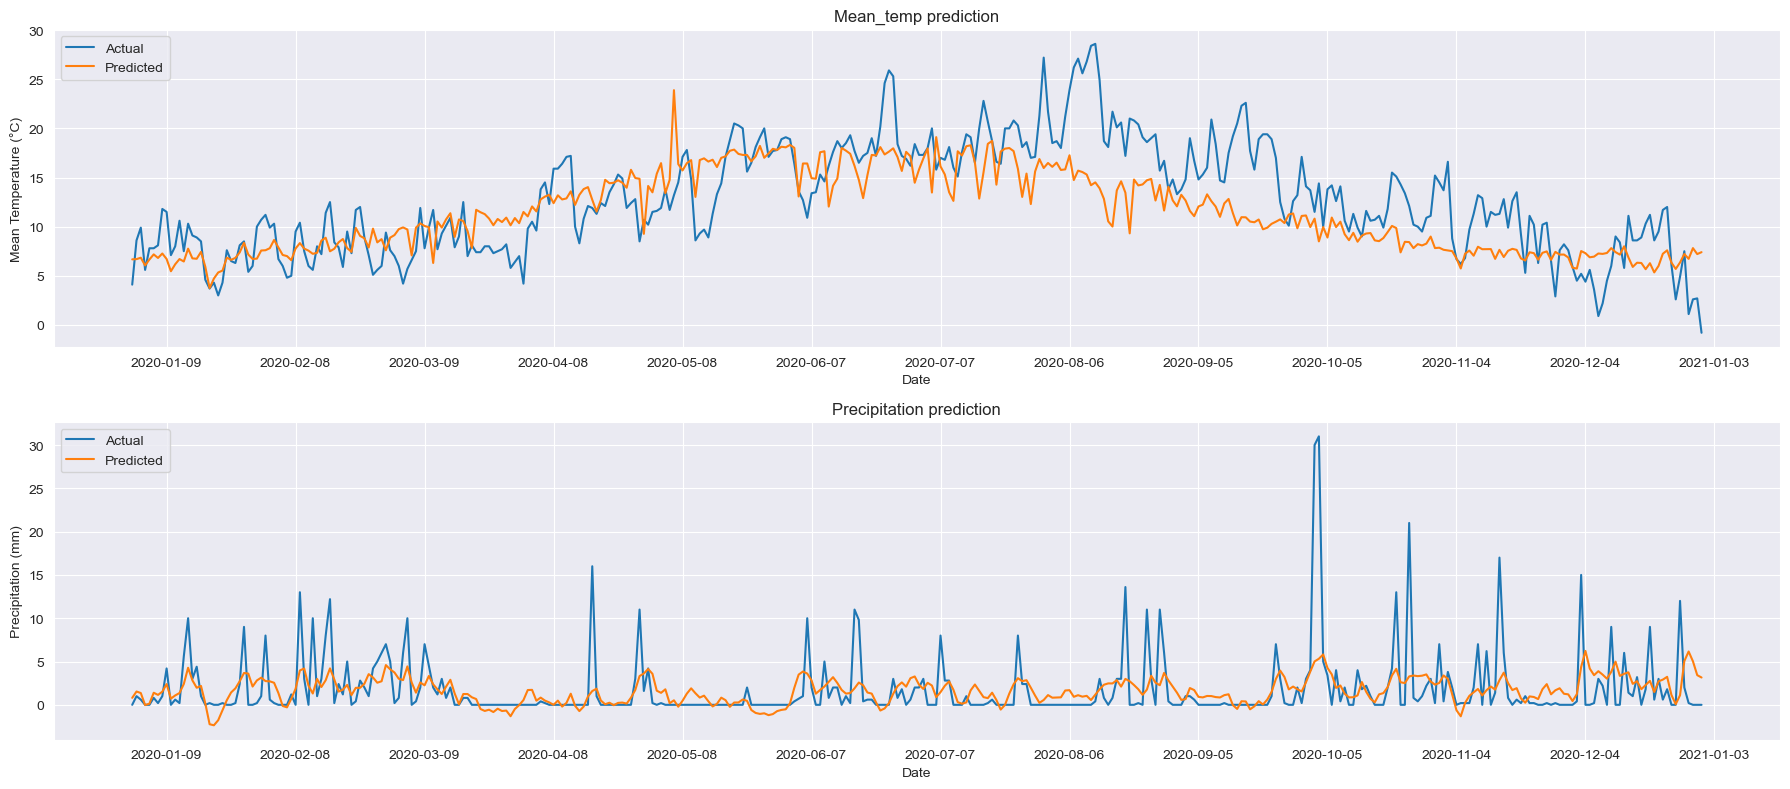

In [40]:

# Create the figure containing two subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,8))

# The plot for mean_temp
ax1.plot(data_2020['date'],data_2020['mean_temp'],label='Actual')
ax1.plot(data_2020['date'],mean_temp_2020_pred, label='Predicted')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Mean_temp prediction')
ax1.legend(loc='upper left')

# The plot for precipitation
ax2.plot(data_2020['date'], data_2020['precipitation'],label='Actual')
ax2.plot(data_2020['date'], precipitation_2020_pred,label='Predicted')
ax2.set_xlabel('Date')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Precipitation prediction')
ax2.legend(loc='upper left')

ax1.xaxis.set_major_locator(plt.MaxNLocator(14))
ax2.xaxis.set_major_locator(plt.MaxNLocator(14))

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

## Multiple output

Train and evaluate the model

In [41]:
from sklearn.multioutput import MultiOutputRegressor

lr=LinearRegression()
model=MultiOutputRegressor(lr)

mse_scores1=[]

for train_index,test_index in tscv.split(df):
    X_train=X.iloc[train_index]
    y_train=Y.iloc[train_index]

    X_test=X.iloc[test_index]
    y_test=Y.iloc[test_index]

    # Normalize the data
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.fit_transform(X_test)

    # Train the model
    model.fit(X_train,y_train)

    # Make the predictions
    y_pred=model.predict(X_test)

    # Calculate the mean squared error
    mse=mean_squared_error(y_test,y_pred)
    mse_scores1.append(mse)

# Print the result
print(f'MSE of prediction: {np.mean(mse_scores1): .3f}')

MSE of prediction:  16.720


Predict the data in 2020

In [42]:
y_pred_2020_multi=model.predict(scaled_X_2020)
print(f"MSE for multiple output of 2020 data: {mean_squared_error(data_2020[['mean_temp','max_temp','min_temp','precipitation']].values,y_pred_2020_multi): .3f}")

MSE for multiple output of 2020 data:  17.055


By comparison, the result of multiple output obtained by linear regression method equals to the result of each single output obtained by linear regression.